# Project Specification

## Finding Donors for CharityML

**1. Exploring the Data**

-  Data Exploration
    -  Student's implementation correctly calculates the following:

        -  Number of records
        -  Number of individuals with income `>$50000`
        -  Number of individuals with income `<=$50000`
        -  Percentage of individuals with income > `$50000`
***

**2. Preparing the Data**

-  Data Preprocessing

    -  Student correctly implements one-hot encoding for the feature and income data.

***

**3. Evaluating Model Performance**

-  Question 1: Naive Predictor Performance

    -  Student correctly calculates the benchmark score of the naive predictor for both accuracy and F1 scores.

-  Question 2: Model Application
	
    -  The pros and cons or application for each model is provided with reasonable justification why each model was chosen to be explored.
    -  Please list all the references you use while listing out your pros and cons.

-  Creating a Training and Predicting Pipeline
	
    -  Student successfully implements a pipeline in code that will train and predict on the supervised learning algorithm given.

-  Initial Model Evaluation
	
    -  Student correctly implements three supervised learning models and produces a performance visualization.

**3. Improving Results**

-  Question 3: Choosing the Best Model
	
    -  Justification is provided for which model appears to be the best to use given computational cost, model performance, and the characteristics of the data.

-  Question 4: Describing the Model in Layman's Terms
	
    -  Student is able to clearly and concisely describe how the optimal model works in layman's terms to someone who is not familiar with machine learning nor has a technical background.

-  Model Tuning
	
    -  The final model chosen is correctly tuned using grid search with at least one parameter using at least three settings. If the model does not need any parameter tuning it is explicitly stated with reasonable justification.

- Question 5: Final Model Evaluation
	
    - Student reports the accuracy and F1 score of the optimized, unoptimized, models correctly in the table provided. Student compares the final model results to previous results obtained.

**4. Feature Importance**

-  Question 6: Feature Relevance Observation
	
    -  Student ranks five features which they believe to be the most relevant for predicting an individual's’ income. Discussion is provided for why these features were chosen.

-  Question 7: Extracting Feature Importances
	
    - Student correctly implements a supervised learning model that makes use of the feature_importances_ attribute. Additionally, student discusses the differences or similarities between the features they considered relevant and the reported relevant features.

- Question 8: Effects of Feature Selection
	
    - Student analyzes the final model's performance when only the top 5 features are used and compares this performance to the optimized model from Question 5.

## Description

CharityML is a fictitious charity organization located in the heart of Silicon Valley that was established to provide financial support for people eager to learn machine learning. After nearly 32,000 letters were sent to people in the community, CharityML determined that every donation they received came from someone that was making more than $50,000 annually. To expand their potential donor base, CharityML has decided to send letters to residents of California, but to only those most likely to donate to the charity. With nearly 15 million working Californians, CharityML has brought you on board to help build an algorithm to best identify potential donors and reduce overhead cost of sending mail. Your goal will be evaluate and optimize several different supervised learners to determine which algorithm will provide the highest donation yield while also reducing the total number of letters being sent.


## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from time import time

#import visuals as vs # supplementary visualization code
%matplotlib inline

In [89]:
# read data from data folder
data = pd.read_csv('census.csv')

In [90]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

In [91]:
# number of dataset records
n_records = data.shape[0]

In [92]:
print('Dataset has %d records'% n_records)

Dataset has 45222 records


In [93]:
# general information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [94]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


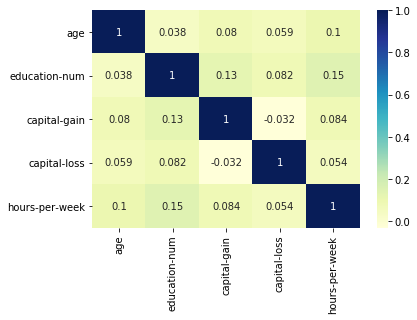

In [95]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

Dataset has 14 features and 45222 entries. There are no missing entries.

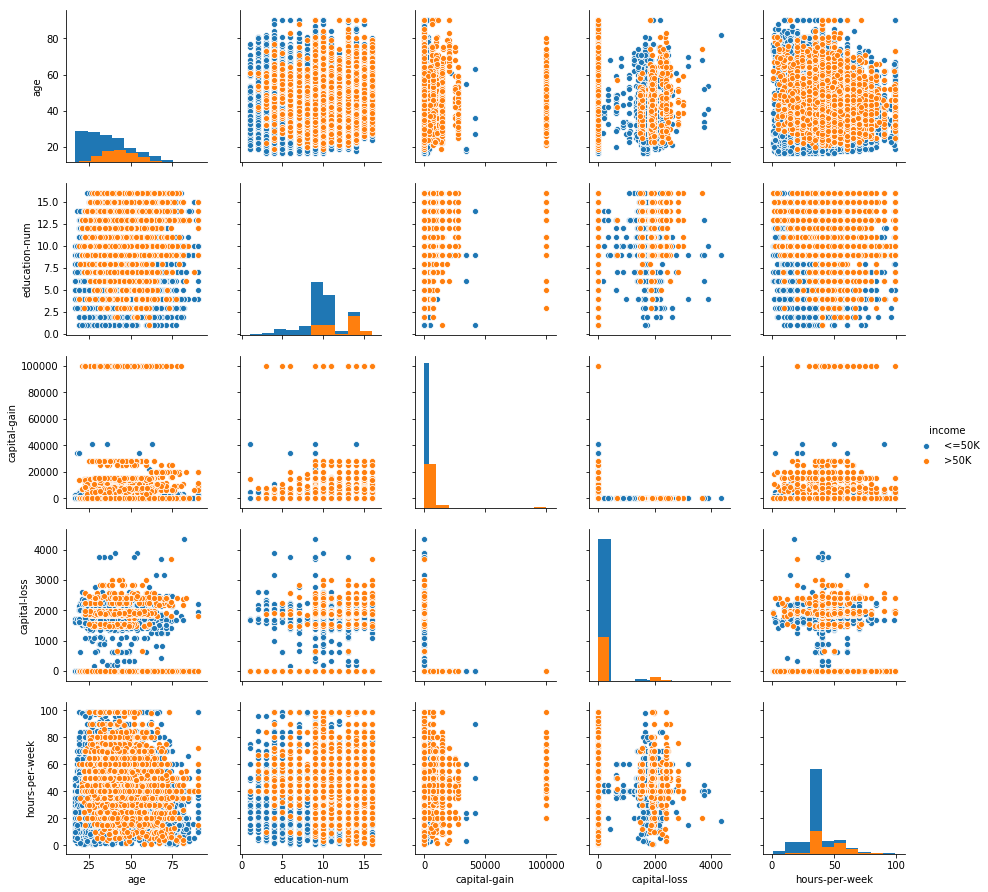

In [100]:
sns.pairplot(data, hue='income', diag_kind='hist')

In [101]:
data[data['capital-gain'] == data['capital-gain'].max()]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1145,54,Self-emp-inc,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K
1256,52,Private,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999.0,0.0,40.0,Japan,>50K
1361,53,Self-emp-inc,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,99999.0,0.0,40.0,United-States,>50K
1406,52,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,50.0,United-States,>50K
1482,46,Private,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K
1544,43,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K
1621,49,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999.0,0.0,20.0,United-States,>50K
1627,50,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,50.0,United-States,>50K
1678,22,Self-emp-not-inc,HS-grad,9.0,Never-married,Prof-specialty,Unmarried,White,Female,99999.0,0.0,40.0,Dominican-Republic,>50K
1935,43,Self-emp-inc,Some-college,10.0,Married-civ-spouse,Sales,Husband,White,Male,99999.0,0.0,55.0,United-States,>50K


In [102]:
data[data['capital-gain'] == data['capital-gain'].max()]['capital-gain'].count()

229

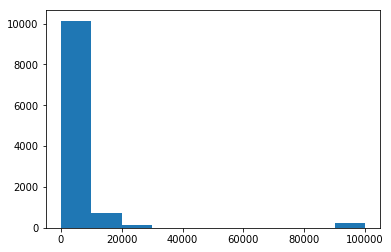

In [103]:
plt.hist(data[data['income']=='>50K']['capital-gain']);

In [104]:
data.loc[data['capital-gain']==99999.0,'capital-gain']  = np.nan

In [105]:
data = data.fillna(data[data['income']=='>50K']['capital-gain'].mean())

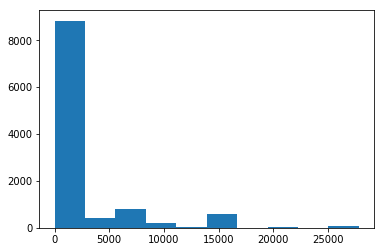

In [106]:
plt.hist(data2[data2['income']=='>50K']['capital-gain']);

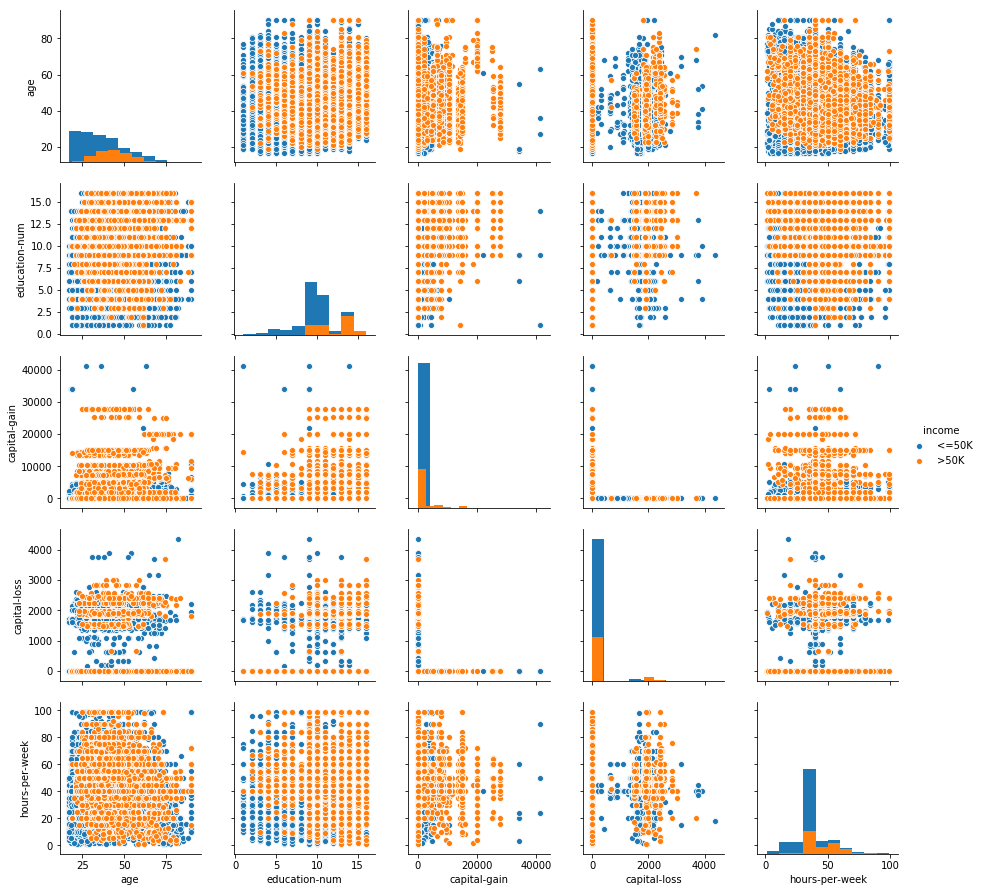

In [107]:
sns.pairplot(data, hue='income', diag_kind='hist')

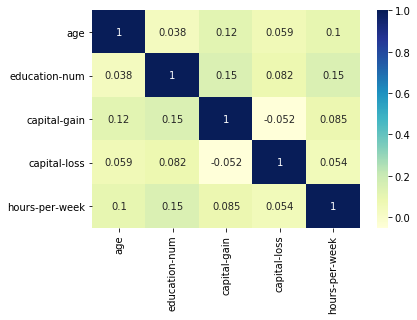

In [108]:
# calculate Pearson's correlation coefficient
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [109]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,605.118207,88.595418,40.938017
std,13.217870,2.552881,2564.050501,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,41310.000000,4356.000000,99.000000


**Comment:** Several pairs of variables are correlated. Possible issues with interpretation of feature relevance.

**TODO:** Turn missing values into targets and predict their values.

In [8]:
# number of entries with income greater than 50K
n_greater_50k = data[data['income'] == '>50K']['income'].count()

In [9]:
print('Dataset has %d individuals earning more than $50,000 annually' % n_greater_50k)

Dataset has 11208 individuals earning more than $50,000 annually


In [10]:
# number of entries with income at most equal to 50K
n_at_most_50k = data[data['income'] == '<=50K']['income'].count()

In [11]:
# check for consistency of number of entries
n_records == n_greater_50k + n_at_most_50k 

True

In [12]:
print('Dataset has %d individuals earning at most $50,000 annually' % n_at_most_50k)

Dataset has 34014 individuals earning at most $50,000 annually


In [13]:
# calculate percentage of entries with income greater than 50K
greater_percent = n_greater_50k / n_records * 100

In [14]:
print('{:4.2f}% of the individuals earn more than $50,000 annually'.format(greater_percent))

24.78% of the individuals earn more than $50,000 annually


In [15]:
# Alternative solution
n_at_most_50k = data['income'].value_counts()[0]
n_greater_50k = data['income'].value_counts()[1]
n_greater_50k, n_at_most_50k

(11208, 34014)

**Comment:** Dataset target is skewed. Accuracy is not a got metric for this problem.

**Featureset Exploration**

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

In [16]:
# separate target column from dataset for preprocessing. 
income_raw = data['income']
# define new feature dataset without target column.
features_raw = data.drop('income', axis=1)

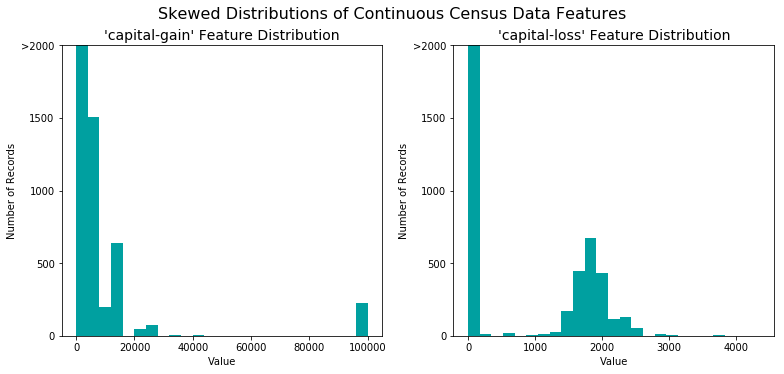

In [17]:
# Udacity solution for visualization of skewed distributions
vs.distribution(data)

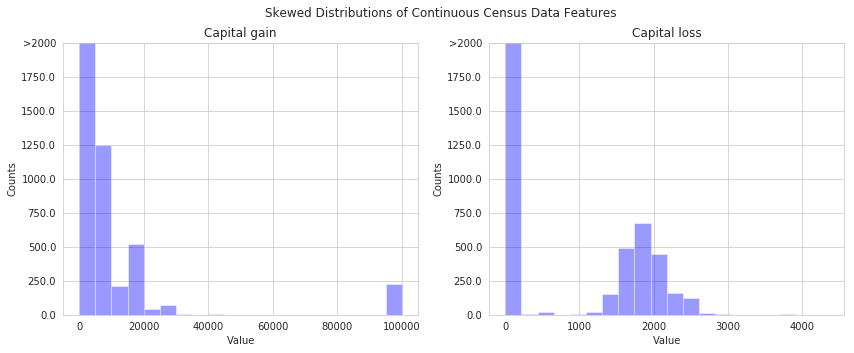

In [18]:
# my solution for visualization of skewed distributions
with sns.axes_style('whitegrid',{'axes.facecolor':'white'}):
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 5))
    ax1.set_ylim([0,2000])
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Counts')
    plt.suptitle('Skewed Distributions of Continuous Census Data Features')
    sns.distplot(data['capital-gain'], 
                 bins=20, 
                 kde=False, 
                 color='blue', 
                 ax=ax1, 
                 axlabel='Value').set_title('Capital gain')
    
    labels=ax1.get_yticks().tolist()
    labels[-1]='>2000'
    ax1.set_yticklabels(labels)
    
    ax2.set_ylim([0,2000])
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Counts')
    sns.distplot(data['capital-loss'], 
                 bins=20, 
                 kde=False, 
                 color='blue',
                 ax=ax2, 
                 axlabel='Value').set_title('Capital loss')
    
    labels=ax2.get_yticks().tolist()
    labels[-1]='>2000'
    ax2.set_yticklabels(labels)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

In [19]:
# Create new dataframe containing transformed skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
# Log-transform skewed features (capital-gain and capital-loss)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1.0))

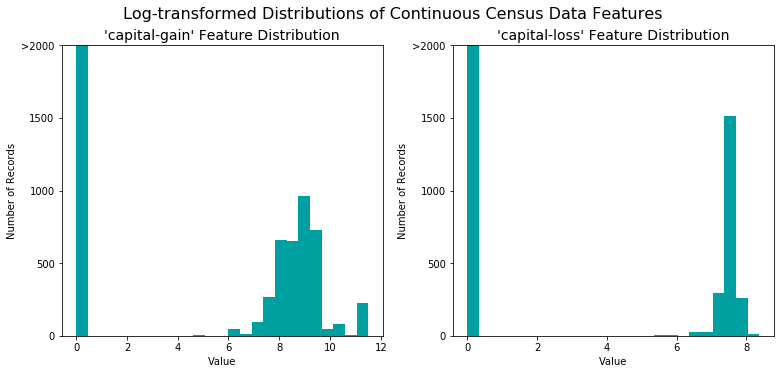

In [20]:
# Udacity solution for visualization of transformed distributions
vs.distribution(features_log_transformed, transformed = True)

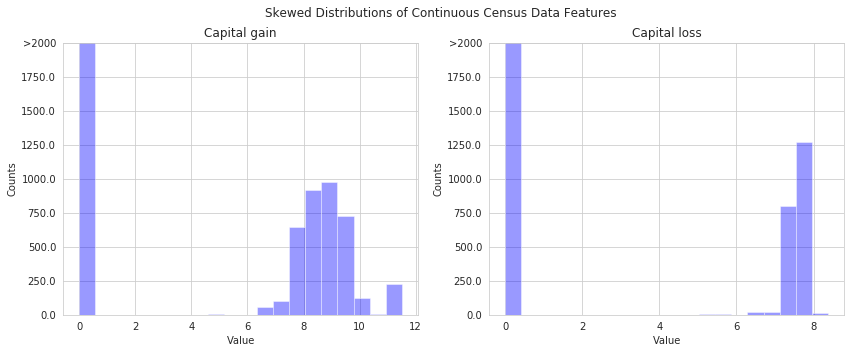

In [21]:
# my solution for visualization of transformed distributions
with sns.axes_style('whitegrid',{'axes.facecolor':'white'}):
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 5))
    ax1.set_ylim([0,2000])
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Counts')
    plt.suptitle('Skewed Distributions of Continuous Census Data Features')
    sns.distplot(features_log_transformed['capital-gain'], 
                 bins=20, 
                 kde=False, 
                 color='blue', 
                 ax=ax1, 
                 axlabel='Value').set_title('Capital gain')
    
    labels=ax1.get_yticks().tolist()
    labels[-1]='>2000'
    ax1.set_yticklabels(labels)
    
    ax2.set_ylim([0,2000])
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Counts')
    sns.distplot(features_log_transformed['capital-loss'], 
                 bins=20, 
                 kde=False, 
                 color='blue',
                 ax=ax2, 
                 axlabel='Value').set_title('Capital loss')
    
    labels=ax2.get_yticks().tolist()
    labels[-1]='>2000'
    ax2.set_yticklabels(labels)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Create MinMaxScaler object - StandardScaler would be an option.
scaler = MinMaxScaler()

In [24]:
# According to data.info() the numerical variables are:
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# Create new dataframe with scaled features
features_log_min_max_transform = pd.DataFrame(data = features_log_transformed)
features_log_min_max_transform[numerical] = scaler.fit_transform(
    features_log_transformed[numerical])

In [25]:
# Inspect new dataframe
features_log_min_max_transform.head(n=5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [26]:
# Create new dataframe with one-hot encoded categorical features
features_final = pd.get_dummies(features_log_min_max_transform) # another option would be sklearn OneHotEncoder()

In [27]:
# Shape of previous dataframe
features_log_min_max_transform.shape

(45222, 13)

In [28]:
# Shape of one-hot encoded dataframe - the number of features is ten-fold larger
features_final.shape

(45222, 103)

In [29]:
# Map target column from strings to (0,1) range.
# Incomes >50K map to 1
income = income_raw.map(lambda x: 0 if x=='<=50K' else 1)

In [30]:
# Print list of features after one-hot encoding
encoded = list(features_final.columns)

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Split features and target into train and test data
# Don't use test set for model evaluation
X_train, X_test, y_train, y_test = train_test_split(
    features_final, income, test_size=0.2, random_state=0)

In [33]:
print('Training set has {} samples'.format(X_train.shape[0]))
print('Testing set has {} samples'.format(X_test.shape[0]))

Training set has 36177 samples
Testing set has 9045 samples


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes \(those who make at most 50,000 , and those who make more\), it's clear most individuals do not make more than \$50,000 . This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

**Please note** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

**HINT:** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [34]:
# True positives without False Negatives - sum the ones
TP = np.sum(income)
# False positives without True negatives - sum all and subtract from TP
FP = income.count() - TP
# There are no True Negatives nor False Negatives
TN = FN = 0

In [35]:
# Calculate metrics
accuracy = (TP + TN) / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

In [36]:
# Calculate F1 score
# I am using beta=1.0 instead of beta=0.5 for consitency with later analysis. 
# I cannot use fbeta_score as a scorer for cross_val_score even by invoking make_scorer
beta = 1.0
fscore = (1 + beta**2) * (precision * recall) / ( recall + (precision * beta**2))

In [37]:
print("Naive predictor: [Accuracy Score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive predictor: [Accuracy Score: 0.2478, F-score: 0.3972]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer:**

The three supervised learning models chosen for this problem were:
-  Logistic Regression
-  Decision Trees
-  Ensemble methods - Ada Boost

In the following I will present the reasons for these choices.

### Logistic Regression

-  Real-world application: one of the main applications is medical research<sup>1</sup>. It is applied to classification problems involving numerical features (e.g. time of exposure to a drug) and the outcome is a binary variable stating if treatment was successful or not succesful.

-  Strengths of the model: this model is a variation of Linear Regression and it is therefore very simple to train. It is also very intuitive and it demands little hyperparameter tuning. It can handle categorical variables as well as numerical ones. Multinomial logistic regression, which is an extension of the basic model, can handle multivariate target classes.

- Weaknesses of the model: the decision bounday is linear and this can severily limit its performance treating data with multiple features separated by complex boundaries. Morevoer, because some of the independent variables are correlated, multicollineatiry will hinder a proper understanding of feature analysis.

-  Why is this a good candidate? This is a very flexible model that can handle both categorical and numerical variables as is the case for this dataset. It was chosen as a baseline for the performance of the more complex methods.

___
<sup>1</sup> Bernard Rosner. Fundamentals of Biostatistics 7th edition. Brooks/Cole, 2010.

### Decision Trees

-  Real-world application: among several decision-making applications, decision trees can be applied as a financial tool for loan granting decisions <sup>1</sup>.

-  Strengths of the model: this model can be used for both classification and regression tasks (binary and multinomial) with complex datasets. The criteria for the definition of the classification boundaries can be inspected and studied since the actual decision tree can be plotted as a directed graph.

-  Weaknesses of the model: decision trees are prone to overfitting. In general decision trees are used as components of ensemble methods.

-  Why is this model a good candidate? This is also a flexible model that can handle a dataset containing multiple mixed features (numeric and categorical) that might require non-linear decision boundaries for classification. It is also a computationally inexpensive model that will probably outperform ensemble methods for small datasets.
____
<sup>1</sup> Jozef Zurada. Could Decision Trees Improve the Classification Accuracy and Interpretability of Loan Granting Decisions? Proceedings of the 43rd Hawaii International Conference on System Sciences - 2010. Hawaii, IEEE Xplore. 

### Ensemble Methods - Ada Boost

-  Real-world application: AdaBoost is one of the most import classification and regression methods in Machine Learning. Among several application, a particularly interesting one is  person recognition <sup>1</sup>. This is the problem of verifying the identity of a person, mainly for security reasons.

-  Strengths of the model: Because it has few hyperparameters optimization using Grid Search can be done more easily than with similar ensemble methods. It is less succeptible to overfitting than other ensemble methods <sup>2</sup>.

- Weaknesses of the model: Training can take a very long time because the method requires several weak learners. It can also be very affected by noisy data.

- Why is this model a good candidate? Because it is one of the most powerful Supervised Learning methods. It builds up on the strength of Decision Trees and its capability of dealing with non-linear boundaries while avoiding the overfitting of a complex dataset. 

___
<sup>1</sup> Nikunj C. Oza, Kagan Turner. Classifier Ensembles: Select real-world applications. Information Fusion 9 (1): 4-20, 2008

<sup>2</sup> Aur&eacute;lien G&eacute;ron. Hands-On Machine Learning with Scikit-Learn & TensorFlow. O'Reilly Media Inc, 2009.

### Why I am not usign the other methods:

- Gaussian Naive Bayes: in principle we could apply Bayesian Statistics for this analysis but numerical and categorical variables would require different training aproaches. While GaussianNB could be used for numerical features, MultinomialNB would be better suited for categorical features. This method split adds another complexity layer to the solution that will probably not imply in improved performace over ensemble methods.

- K-Nearest Neighbours: this method is metric-based and it is not directly applicable to non-ordinal categorical data, as is the case for most of the categorical features in this dataset.

- Support Vector Machines (SVM): this method is also metric-based and therefore not directly applicable to non-ordinal categorical data. Moreover, our data preprocessing used one-hot encoding which greatly expanded the dimensions of the space of solutions turning this method prohibitivily expensive.

- Stochastic Gradient Descent: in principle this method could be applied to this problem. However, its basic loss function defaults to a linear SVM. Therefore, we can expect that this method would suffer from the same issues discussed above for SVM.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [38]:
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer, f1_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [39]:
'''
This function trains and evaluates a model using a defined sample size.

INPUT:
    model - instantiated sklearn model
    sample_size - number of entries to be taken from training set
    X_train - numpy array or pandas dataframe with training features
    y_train - numpy array or pandas dataframe with target values
    
OUTPUT:
    results - dictionary containing the performance parameters for the model
    
'''

def trainPredict(model, sample_size, X_train, y_train):
    results = {}
    
    # shuffle training and target data and return array with n_samples elements
    X_train_shuffled, y_train_shuffled = shuffle(X_train.values, 
                                                 y_train.values, 
                                                 n_samples = sample_size)
    
    # fit training data and measure time
    start = time()
    model.fit(X_train_shuffled, y_train_shuffled)
    end = time()
    results['train_time'] = end - start
    
    # predict using the first 300 elements of training set and measure time
    start = time()
    predictions_train = model.predict(X_train[:300])
    # evaluate accuracy and F1 scores using 3-fold cross-validation
    # I cannot use X_test here because this is still a step of model selection
    accuracy_crossval = cross_val_score(model, 
                                        X_train_shuffled, 
                                        y_train_shuffled, 
                                        cv=3, 
                                        scoring='accuracy')
    f1_crossval = cross_val_score(model, 
                                  X_train_shuffled, 
                                  y_train_shuffled, 
                                  cv=3, 
                                  scoring='f1')
    end = time()
    results['pred_time'] = end - start
    
    # calculate accuracy using the first 300 entries of training set
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    # average accuracy score calculated using 3-fold cross validation
    results['acc_test'] = accuracy_crossval.mean()
    # compute F1 score using the first 300 samples of training set
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=1.0)
    # average F1 score calculated using 3-fold cross validation
    results['f_test'] = f1_crossval.mean()
    print("{} trained on {} samples".format(model.__class__.__name__, sample_size))
    
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [40]:
# Import supervised learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [41]:
# Intantiate the models
clf_A = DecisionTreeClassifier(random_state=34)
clf_B = AdaBoostClassifier(n_estimators=500, random_state=34)
clf_C = LogisticRegression(random_state=34)

In [42]:
# Calculate number of entries corresponding to 1%, 10%, 100% of total entries
# 1% of training entries
samples_1 = int(0.01 * X_train.shape[0]) 
# 10% of training entries
samples_10 = int(0.1 * X_train.shape[0])
# 100% of training entries
samples_100 = X_train.shape[0]

In [43]:
# Collect results on the learners
results = {}

for clf in [clf_A, clf_B, clf_C]:
#for clf in [clf_A, clf_B, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name]={}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = trainPredict(clf, samples, X_train, y_train)

DecisionTreeClassifier trained on 361 samples
DecisionTreeClassifier trained on 3617 samples
DecisionTreeClassifier trained on 36177 samples
AdaBoostClassifier trained on 361 samples
AdaBoostClassifier trained on 3617 samples
AdaBoostClassifier trained on 36177 samples
LogisticRegression trained on 361 samples
LogisticRegression trained on 3617 samples
LogisticRegression trained on 36177 samples


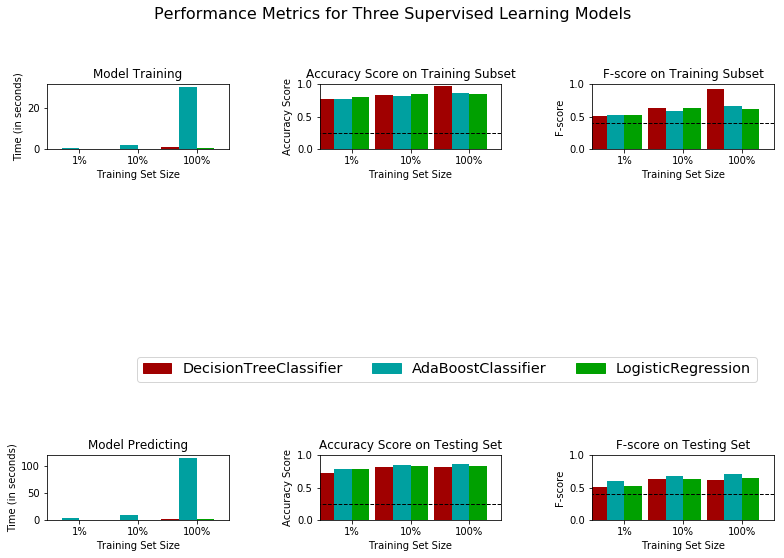

In [44]:
# Run Udacity metrics visualization function for the supervised learning models chosen
vs.evaluate(results, accuracy, fscore)
# very ugly plotting

In [45]:
# my solution for metrics visualization for the supervised learning process

# first convert dict to pandas dataframe
df2 = pd.DataFrame.from_dict({(i,j): results[i][j] for i in results.keys() 
                              for j in results[i].keys()}, orient='index')
df2.reset_index(inplace=True)
d2 = {0:'1%',1:'10%',2:'100%'}
df2['dataP'] = df2['level_1'].map(d2)
df2.rename(index=str, columns={'level_0':'model'}, inplace=True)

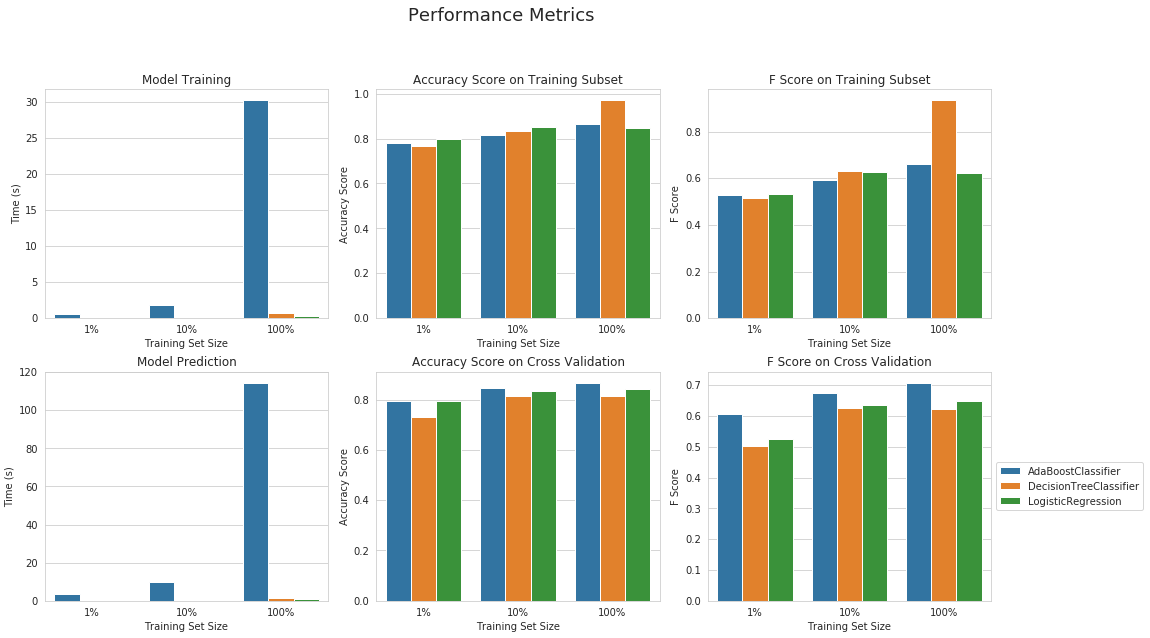

In [46]:
# then plot using Seaborn
with sns.axes_style('whitegrid',{'axes.facecolor':'white'}):
    f, axes = plt.subplots(2,3, figsize=(14,8))
    plt.suptitle('Performance Metrics', y=1.1, fontsize=18)
    sns.barplot(x='dataP',y='train_time',hue='model',data=df2, ax=axes[0][0])
    axes[0][0].set_title('Model Training')
    axes[0][0].set_xlabel('Training Set Size')
    axes[0][0].set_ylabel('Time (s)')
    axes[0][0].get_legend().set_visible(False)
    sns.barplot(x='dataP',y='acc_train',hue='model',data=df2, ax=axes[0][1])
    axes[0][1].set_title('Accuracy Score on Training Subset')
    axes[0][1].set_xlabel('Training Set Size')
    axes[0][1].set_ylabel('Accuracy Score')
    axes[0][1].get_legend().set_visible(False)
    sns.barplot(x='dataP',y='f_train',hue='model',data=df2, ax=axes[0][2])
    axes[0][2].set_title('F Score on Training Subset')
    axes[0][2].set_xlabel('Training Set Size')
    axes[0][2].set_ylabel('F Score')
    axes[0][2].get_legend().set_visible(False)
    sns.barplot(x='dataP',y='pred_time',hue='model',data=df2, ax=axes[1][0])
    axes[1][0].set_title('Model Prediction')
    axes[1][0].set_xlabel('Training Set Size')
    axes[1][0].set_ylabel('Time (s)')
    axes[1][0].get_legend().set_visible(False)
    sns.barplot(x='dataP',y='acc_test',hue='model',data=df2, ax=axes[1][1])
    axes[1][1].set_title('Accuracy Score on Cross Validation')
    axes[1][1].set_xlabel('Training Set Size')
    axes[1][1].set_ylabel('Accuracy Score')
    axes[1][1].get_legend().set_visible(False)
    sns.barplot(x='dataP',y='f_test',hue='model',data=df2, ax=axes[1][2])
    axes[1][2].set_title('F Score on Cross Validation')
    axes[1][2].set_xlabel('Training Set Size')
    axes[1][2].set_ylabel('F Score')
    axes[1][2].get_legend().set_visible(False)
    plt.tight_layout()
    plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))

In [47]:
# inspect actual training parameters for the models
df2

,model,level_1,train_time,pred_time,acc_train,acc_test,f_train,f_test,dataP
0,AdaBoostClassifier,0,0.597256,3.611978,0.780000,0.795078,0.528571,0.605951,1%
1,AdaBoostClassifier,1,1.878908,9.662922,0.816667,0.845733,0.592593,0.675493,10%
2,AdaBoostClassifier,2,30.193561,114.316205,0.863333,0.866213,0.661157,0.707128,100%
3,DecisionTreeClassifier,0,0.002252,0.022393,0.766667,0.731198,0.513889,0.503941,1%
4,DecisionTreeClassifier,1,0.030521,0.125571,0.833333,0.813385,0.632353,0.625412,10%
5,DecisionTreeClassifier,2,0.683680,1.447742,0.970000,0.814634,0.934307,0.621016,100%
6,LogisticRegression,0,0.001711,0.010204,0.800000,0.794972,0.531250,0.525647,1%
7,LogisticRegression,1,0.010351,0.055607,0.850000,0.834947,0.628099,0.635468,10%
8,LogisticRegression,2,0.277073,1.032249,0.846667,0.841059,0.622951,0.649427,100%


**Comments:**

-  The data is skewed so the accuracy score is a not a good metric for this dataset.
-  Ada Boost received the best accuracy and F1 scores for the full training set.
-  However, it was also the most time-consuming method for training by a large margin.
-  Decision Tree received the best scores for a small training set but it is badly overfitting.
-  Logistic regression demanded much less resources for training with the full dataset but it received scores similar to Ada Boost and better than Decision Tree.

### Learning Curve Analysis

In the following we perform a learning curve analysis for model selection.

In [48]:
from sklearn.model_selection import learning_curve

In [49]:
'''
This function plots the learning curve for a given model.

INPUT:
    model - instantiated sklearn model
    X - numpy array or pandas dataframe with training features
    y - numpy array or pandas dataframe with target values
    
OUTPUT:
    graph with learning curves (Training scores and Testing scores)
    
'''
def plotLearning(model,X,y):
    train_sizes, train_scores, test_scores = learning_curve(model,
                                                            X,
                                                            y,
                                                            cv=3,
                                                            n_jobs=-1,
                                                            shuffle=True,
                                                       train_sizes=np.linspace(.1, 1.0, 10),
                                                           scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fig, ax = plt.subplots(1)
    
    ax.grid()
    ax.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, 
                 color='r')
    
    ax.set_xlabel('Elements in Training Set')
    ax.set_ylabel('F1 Score')
    ax.set_title(str(model.__class__.__name__))
    ax.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training scores')
    plt.legend()
    ax.fill_between(train_sizes,
                test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std,
                alpha=0.1,
                color='b')
    ax.plot(train_sizes, test_scores_mean, 'o-', color='b', label='Testing scores')
    plt.legend()

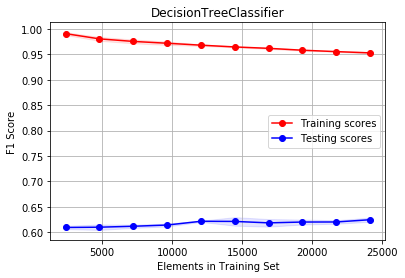

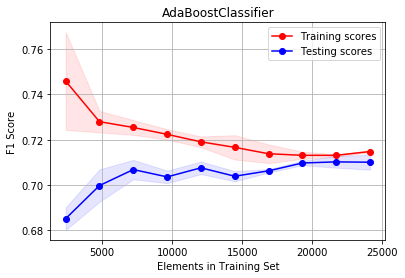

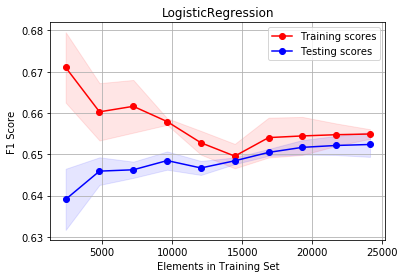

In [50]:
# plot learning curves for all models
for clf in [clf_A, clf_B, clf_C]:
    plotLearning(clf, X_train, y_train)

**Comments:** 

-  F1 score was used for learning curves because accuracy is not a good metric for this problem.
-  Decision Tree is overfitting
-  AdaBoost and Logistic Regression show balanced learning curves. However, the score for AdaBoost is higher.

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

**Answer:**

AdaBoost was selected the best model. Despite having a much larger training time, its learning curves converged to a higher score than Logistic Regression. The curves showed that the model is not overfitting nor underfitting. Moreover, AdaBoost also received the best F1 and Accuracy scores for the full training set. 

Another advantage of AdaBoost over Logistic Regression is that it returns a list with estimator weights after fitting the data set. This list will be used for the feature selection analysis.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

AdaBoost or Adaptive Boosting is a very intuitive yet powerful member of the Boosting method category. The main idea behind Boosting methods is to combine several weak learners into a strong learner. Learners are trained sequentially and each one tries to correct its predecessor <sup>1</sup>. 

AdaBoost was explained by its creators, Y. Freund and R. Shapire, using a curious analogy with horse-racing gambling <sup>2</sup>. Suppose that a gambler wants to accurately predict the winner of a sequence of horse races using all the information that is available (e.g. betting odds, winning history of a horse). The prediction strategy is to present to a self-styled expert a specific set of races and ask him to predict the outcome of each one. The expert will come up with predictions based on several "rules of thumb" that are probably just slightly better than random guessing. Each rule is not very precise or informative but, taken together in a specific way, they can lead to very good predictions for the races. The secret lies in how we combine them. We actually follow a very simple sequence:

1. take all races, appy one rule and predict the results
2. check predictions and highlight the wrong ones
3. take the next rule and predict results, focusing on the wrong ones
4. check predictions and highlight the wrong ones
5. repeat this process for all rules

The final prediction is a combination of the predictions of all rules. Despite each prediction being quite unreliable, if we take all of them together we can place some fairly confident bets in the outcomes of the races. This method is an example of how group work can be an effective tool for problem solving.
_____
<sup>1</sup> Aur&eacute;lien G&eacute;ron Hands-On Machine Learning with Scikit-Learn & TensorFlow. O'Reilly Media Inc, 2009.

<sup>2</sup> Yoav Freunde, Robert E. Shapire. A Short Introduction to Boosting. Journal of Japanese Society for Artificial Intelligence, 14(5):771 - 780, 1999.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [51]:
from sklearn.grid_search import GridSearchCV

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [52]:
# Instantiate the best model (AdaBoost) with the original set of parameters
clf = AdaBoostClassifier(n_estimators=500, random_state=34)

In [53]:
# Define a dictionary with all the parameters to be tested
parameters={"n_estimators": [500, 600, 700, 1000],
            "learning_rate": [0.1, 1.0, 10.0]
           }

In [110]:
# try this
parameters = {"n_estimators": [500, 600, 700, 1000],
            "learning_rate": [0.1, 1.0, 10.0],
            "base_estimator": ['DecisionTreeClassifier(max_depth=2)']
           }


In [54]:
# Define a F1 scorer that will evaluate the quality of solutions found in the grid
scorer = make_scorer(fbeta_score, beta=1.0)

In [55]:
# Generate a object for grid search
grid_obj = GridSearchCV(clf, param_grid = parameters, cv=3, scoring=scorer, n_jobs=-1)

In [56]:
# Run grid on training set
grid_fit = grid_obj.fit(X_train, y_train)

In [57]:
# Select the instance with the best perfomance
best_clf = grid_fit.best_estimator_

In [58]:
best_clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=34)

In [59]:
# Get predictions for unoptimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)

In [60]:
# Get predictions for best models using the actual Testing set
best_predictions = best_clf.predict(X_test)

In [61]:
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8664
F-score on testing data: 0.7432

Optimized Model
------
Final accuracy score on the testing data: 0.8676
Final F-score on the testing data: 0.7448


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**? 

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |         0.8664    |   0.8676        |
| F-score        |         0.7432    |   0.7448        |


**Answer:**

The optimized scores are slightly better than the unoptmized ones. One option to increase these scores would be to optimize the trees used by AdaBoost.  

The results for the naive predictor were:

-  Accuracy Score: 0.2478
-  F-score: 0.3972 

Both scores are less than half the scores obtained using AdaBoots. Therefore, the results obtained by AdaBoost are meaningful and they are better than random guesses.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

Since Income is the target attribute, the five features that are probably the most important are, in descending order:

1.  occupation
2.  capital-gain
3.  education
4.  age
5.  marital-status

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [62]:
# Retrieve the best model
best_clf = grid_fit.best_estimator_

In [63]:
# Fit the best model to training data
best_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=34)

In [64]:
# Construct dataframe containing feature labels and their weights
feature_importances = pd.DataFrame(best_clf.feature_importances_, 
                                   index = X_train.columns, 
                                   columns=['importance']).sort_values('importance',
                                                                       ascending=False)

In [65]:
feature_importances.reset_index(inplace=True)

In [66]:
# Add cumulative sum of weights as a separate column
feature_importances['cumsum'] = np.cumsum(feature_importances['importance'])

In [67]:
feature_importances.head()

,index,importance,cumsum
0,capital-gain,0.427,0.427
1,capital-loss,0.371,0.798
2,age,0.050,0.848
3,hours-per-week,0.037,0.885
4,education-num,0.006,0.891


In [68]:
importance = best_clf.feature_importances_

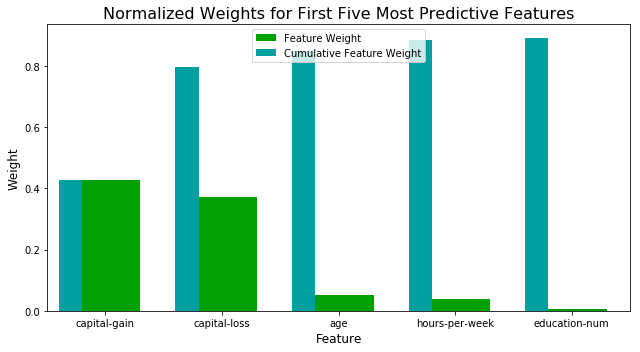

In [69]:
vs.feature_plot(importance, X_train, y_train)

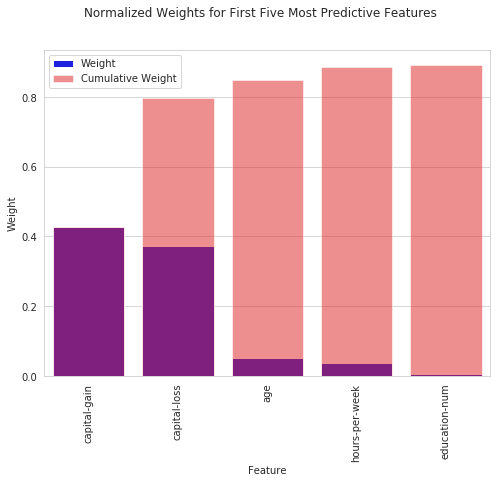

In [70]:
# My solution for visualization of the five most important features
with sns.axes_style('whitegrid',{'axes.facecolor':'white'}):
    fig, axis = plt.subplots(1,1, figsize=(8,6))
    plt.suptitle('Normalized Weights for First Five Most Predictive Features')
    sns.barplot(x='index',
                y='importance',
                data=feature_importances.iloc[:5], 
                ax=axis, 
                color='blue', 
                ci=None, label='Weight')
    sns.barplot(x='index',
                y='cumsum',
                data=feature_importances.iloc[:5], 
                ax=axis, 
                color='red', 
                alpha=0.5, 
                ci=None, label='Cumulative Weight')
    plt.xticks(rotation=90)
    plt.legend()
    axis.set_xlabel('Feature')
    axis.set_ylabel('Weight')

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

In Question 6 the following features were listed, in descending order, as the most important for income prediction:

1. occupation
2. capital-gain 
3. education
4. age
5. marital-status 

The model classified the following features, in descending order, as the most important for income prediction:

1. capital-gain
2. capital-loss
3. age
4. hours-per-week
5. education

Both predictions agreed that capital-gain, age and education are important features for income prediction. However, capital-loss and hour-per-week as the second and fourth most important features. 

Capital-loss is probably correlated with capital-gain, since high levels of financial investment imply in high levels of losses over time. The correlation analysis showed a weak anticorrelation between them.

Hours-per-week is probably associated to the fact that high-paying jobs like executive positions in general require longer working hours.  

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [71]:
from sklearn.base import clone

In [72]:
# Colect the first five columns in descending order of importance
X_train_reduced = X_train[X_train.columns.values[np.argsort(importance)[::-1][:5]]]

In [73]:
# Same selection for testing set
X_test_reduced = X_test[X_test.columns.values[np.argsort(importance)[::-1][:5]]]

In [74]:
# Clone best model obtained above and train it with reduced training set
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

In [75]:
# Predictions with reduced test set
reduced_predictions = clf.predict(X_test_reduced)

In [76]:
# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8676
F-score on testing data: 0.7448

Final Model trained on reduced data
------
Accuracy on testing data: 0.8433
F-score on testing data: 0.7053


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

Scores obtained above:

Unoptimized model:

-  Accuracy score on cross-validated data: 0.8664
-  F-score on cross-validated data: 0.7432

Optimized Model:

-  Accuracy score on cross-validated data: 0.8676
-  F-score on cross-validated data: 0.7448

Model trained on reduced data:

-  Accuracy on testing data: 0.8433
-  F-score on testing data: 0.7053

The model trained on reduced data performed worse than the unoptimized model. One possible reason is that some of the features that were excluded were correlated to the five top features and that might have affected the feature importance analysis. A proper correlation analysis is required for feature selection to be applied. Perhaps a dimension reduction technique like PCA or LDA should be applied for a proper selection of the main features of the dataset. Time was not a factor for this dataset.